# Stock Price Prediction

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data
import plotly.express as px
import seaborn as sns
import streamlit as st
import requests
import codecs
import os
from streamlit_lottie import st_lottie
import warnings
warnings.filterwarnings("ignore")

In [2]:
from datetime import date
from datetime import timedelta
today = date.today()
print("Today is: ", today)
 
# Yesterday date
yesterday = today - timedelta(days = 1)
print("Yesterday was: ", yesterday)

Today is:  2022-11-25
Yesterday was:  2022-11-24


# Extracting the data

In [3]:
start='2008-01-01'
end=yesterday;

df=data.DataReader('AAPL','yahoo',start,end) #extracting data of aapl from yahoo between start and end datesaa
df

2022-11-25 21:16:37.932 INFO    numexpr.utils: NumExpr defaulting to 8 threads.


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2007-12-31,7.160714,7.062500,7.125000,7.074286,5.393332e+08,6.030248
2008-01-02,7.152143,6.876786,7.116786,6.958571,1.079179e+09,5.931611
2008-01-03,7.049643,6.881786,6.978929,6.961786,8.420664e+08,5.934351
2008-01-04,6.892857,6.388929,6.837500,6.430357,1.455832e+09,5.481349
2008-01-07,6.557143,6.079643,6.473214,6.344286,2.072193e+09,5.407982
...,...,...,...,...,...,...
2022-11-17,151.479996,146.149994,146.429993,150.720001,8.038940e+07,150.720001
2022-11-18,152.699997,149.970001,152.309998,151.289993,7.479460e+07,151.289993
2022-11-21,150.369995,147.720001,150.160004,148.009995,5.872410e+07,148.009995


# Preprocessing

In [4]:
df=df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2007-12-31,7.160714,7.062500,7.125000,7.074286,5.393332e+08,6.030248
1,2008-01-02,7.152143,6.876786,7.116786,6.958571,1.079179e+09,5.931611
2,2008-01-03,7.049643,6.881786,6.978929,6.961786,8.420664e+08,5.934351
3,2008-01-04,6.892857,6.388929,6.837500,6.430357,1.455832e+09,5.481349
4,2008-01-07,6.557143,6.079643,6.473214,6.344286,2.072193e+09,5.407982


In [5]:
date=df['Date']
df.drop(['Date','Adj Close'],axis=1,inplace=True)
df.head()

,High,Low,Open,Close,Volume
0,7.160714,7.062500,7.125000,7.074286,5.393332e+08
1,7.152143,6.876786,7.116786,6.958571,1.079179e+09
2,7.049643,6.881786,6.978929,6.961786,8.420664e+08
3,6.892857,6.388929,6.837500,6.430357,1.455832e+09
4,6.557143,6.079643,6.473214,6.344286,2.072193e+09


In [6]:
df.describe()

,High,Low,Open,Close,Volume
count,3753.000000,3753.000000,3753.000000,3753.000000,3.753000e+03
mean,44.988026,43.999013,44.488739,44.512993,3.374145e+08
std,46.860508,45.713368,46.274469,46.311801,3.338000e+08
min,2.928571,2.792857,2.835357,2.792857,4.100000e+07
25%,13.882143,13.588571,13.770000,13.719286,1.092376e+08
50%,27.022499,26.557501,26.817499,26.807501,2.045888e+08
75%,50.712502,49.787498,50.145000,50.310001,4.475800e+08
max,182.940002,179.119995,182.630005,182.009995,3.372970e+09


# EDA(Exploratory Data Analysis)

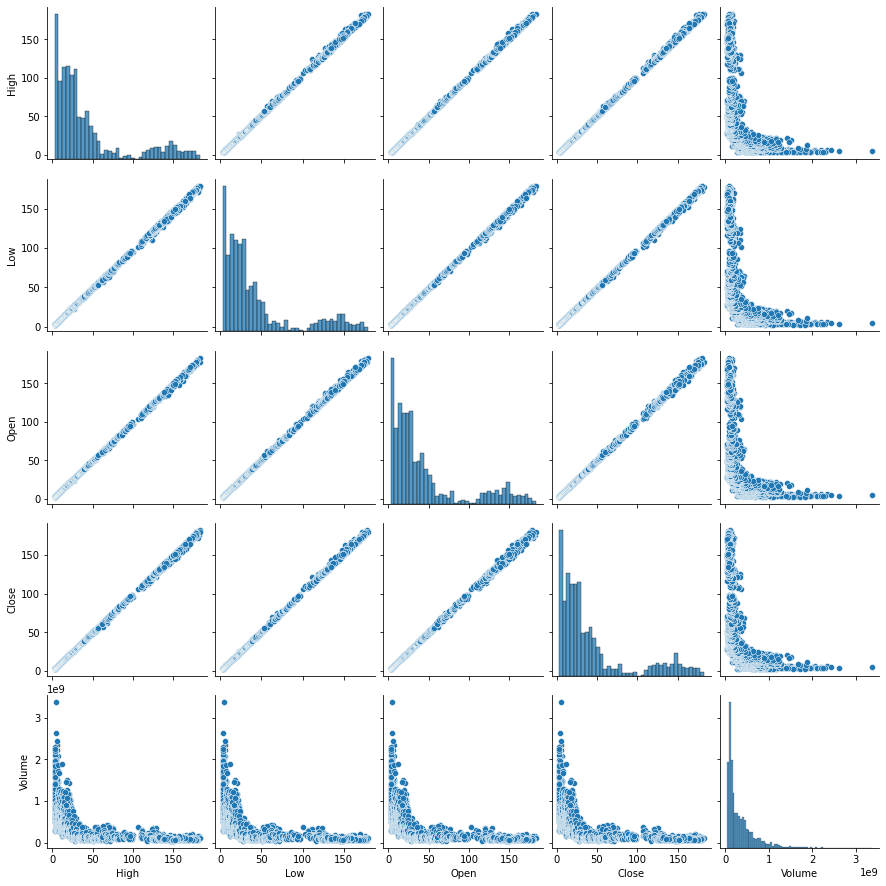

In [7]:
sns.pairplot(df)

<AxesSubplot:xlabel='Open', ylabel='Density'>

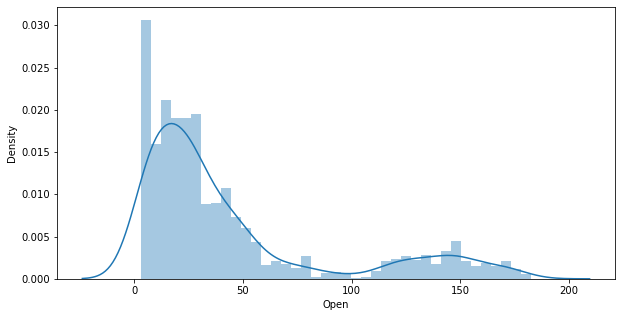

In [8]:
plt.subplots(figsize=(10,5))
sns.distplot(df['Open'])

<AxesSubplot:xlabel='Close', ylabel='Density'>

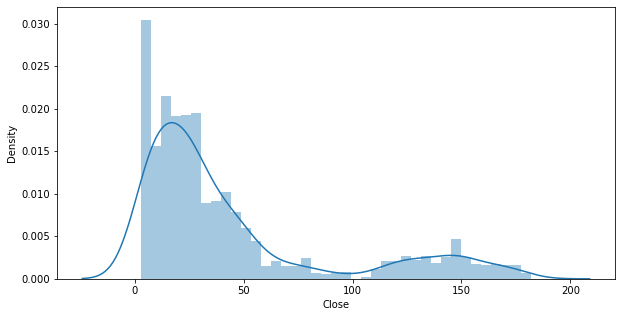

In [9]:
plt.subplots(figsize=(10,5))
sns.distplot(df['Close'])

# Model SELECTION AND PREDICTION for attribute Close

In [10]:
average100=df['Close'].rolling(100).mean()
average100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3748    152.466899
3749    152.587499
3750    152.700399
3751    152.812899
3752    152.907999
Name: Close, Length: 3753, dtype: float64

In [11]:
average30=df['Close'].rolling(100).mean()
average30

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3748    152.466899
3749    152.587499
3750    152.700399
3751    152.812899
3752    152.907999
Name: Close, Length: 3753, dtype: float64

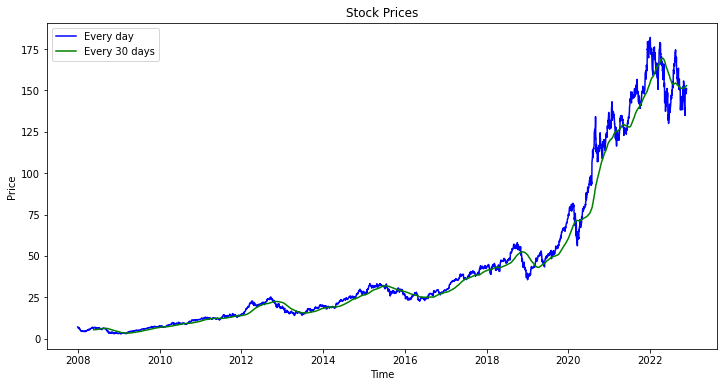

In [12]:
plt.figure(figsize=(12,6))
plt.plot(date,df['Close'],color='blue',label="Every day")
plt.plot(date,average30,color='green',label="Every 30 days")
plt.title("Stock Prices")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

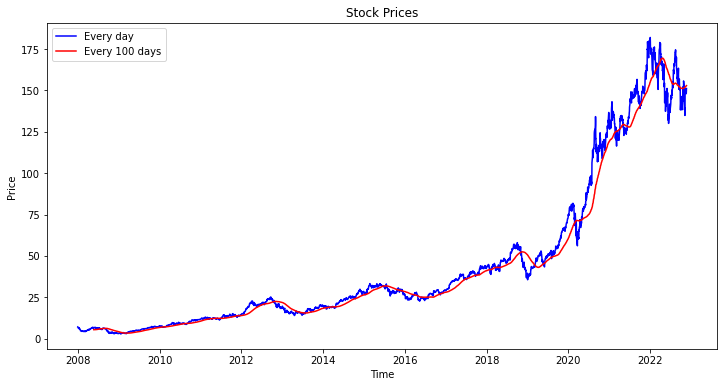

In [13]:
plt.figure(figsize=(12,6))
plt.plot(date,df['Close'],color='blue',label="Every day")
plt.plot(date,average100,color='red',label="Every 100 days")
plt.title("Stock Prices")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

In [14]:
df.shape

(3753, 5)

In [15]:
#Splitting data into training and testing

data_training= pd.DataFrame(df['Close'][0:int(len(df)*0.7)])
data_testing= pd.DataFrame(df['Close'][int(len(df)*0.7):int(len(df))])
ydate= date[int(len(df)*0.7):int(len(df))]
yydate=date[0:int(len(df)*0.7)]
print(data_training.shape)
print(data_testing.shape)

(2627, 1)
(1126, 1)


In [16]:
data_training.head()

,Close
0,7.074286
1,6.958571
2,6.961786
3,6.430357
4,6.344286


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [18]:
dataset_train = scaler.fit_transform(data_training)
dataset_test = scaler.transform(data_testing)

In [19]:
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    print(x)
    return x,y

In [20]:
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)
#displaying x_train and x_test

[[0.09368115 0.09114921 0.09121955 ... 0.03242268 0.03840864 0.03737711]
 [0.09114921 0.09121955 0.07959146 ... 0.03840864 0.03737711 0.03886971]
 [0.09121955 0.07959146 0.07770815 ... 0.03737711 0.03886971 0.03783038]
 ...
 [0.86253385 0.84114534 0.88397704 ... 0.96455311 0.96110685 0.97954149]
 [0.84114534 0.88397704 0.859744   ... 0.96110685 0.97954149 0.9882391 ]
 [0.88397704 0.859744   0.84956941 ... 0.97954149 0.9882391  0.99633497]]
[[0.99715555 0.98752794 0.98495694 ... 1.08626513 1.08894556 1.10579379]
 [0.98752794 0.98495694 0.99070067 ... 1.08894556 1.10579379 1.12909683]
 [0.98495694 0.99070067 0.98205774 ... 1.10579379 1.12909683 1.11750002]
 ...
 [3.51487105 3.30503414 3.33719896 ... 3.19453597 3.23676611 3.249238  ]
 [3.30503414 3.33719896 3.27286932 ... 3.23676611 3.249238   3.17746896]
 [3.33719896 3.27286932 3.2363284  ... 3.249238   3.17746896 3.22495028]]


In [21]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [22]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [23]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [24]:
yydate

0      2007-12-31
1      2008-01-02
2      2008-01-03
3      2008-01-04
4      2008-01-07
          ...    
2622   2018-05-31
2623   2018-06-01
2624   2018-06-04
2625   2018-06-05
2626   2018-06-06
Name: Date, Length: 2627, dtype: datetime64[ns]

In [25]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [26]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [27]:
model.fit(x_train, y_train, epochs=50, batch_size=32)
model.save('stock_prediction')

Epoch 1/50
81/81 [==============================] - 26s 187ms/step - loss: 0.0103
Epoch 2/50
81/81 [==============================] - 15s 179ms/step - loss: 0.0021
Epoch 3/50
81/81 [==============================] - 15s 182ms/step - loss: 0.0020
Epoch 4/50
81/81 [==============================] - 14s 179ms/step - loss: 0.0016
Epoch 5/50
81/81 [==============================] - 14s 168ms/step - loss: 0.0016
Epoch 6/50
81/81 [==============================] - 15s 184ms/step - loss: 0.0016
Epoch 7/50
81/81 [==============================] - 14s 176ms/step - loss: 0.0015
Epoch 8/50
81/81 [==============================] - 14s 176ms/step - loss: 0.0017
Epoch 9/50
81/81 [==============================] - 15s 182ms/step - loss: 0.0012
Epoch 10/50
81/81 [==============================] - 15s 182ms/step - loss: 0.0013
Epoch 11/50
81/81 [==============================] - 15s 183ms/step - loss: 0.0011
Epoch 12/50
81/81 [==============================] - 15s 184ms/step - loss: 0.0013
Epoch 13/50
8

2022-11-25 21:29:45.639 WARNING absl: Found untraced functions such as lstm_cell_layer_call_fn, lstm_cell_layer_call_and_return_conditional_losses, lstm_cell_1_layer_call_fn, lstm_cell_1_layer_call_and_return_conditional_losses, lstm_cell_2_layer_call_fn while saving (showing 5 of 8). These functions will not be directly callable after loading.
2022-11-25 21:29:59.895 INFO    tensorflow: Assets written to: stock_prediction\assets
2022-11-25 21:30:08.892 WARNING absl: <keras.layers.recurrent.LSTMCell object at 0x0000029C96B6E940> has the same name 'LSTMCell' as a built-in Keras object. Consider renaming <class 'keras.layers.recurrent.LSTMCell'> to avoid naming conflicts when loading with `tf.keras.models.load_model`. If renaming is not possible, pass the object in the `custom_objects` parameter of the load function.
2022-11-25 21:30:08.902 WARNING absl: <keras.layers.recurrent.LSTMCell object at 0x0000029C96D12850> has the same name 'LSTMCell' as a built-in Keras object. Consider renami

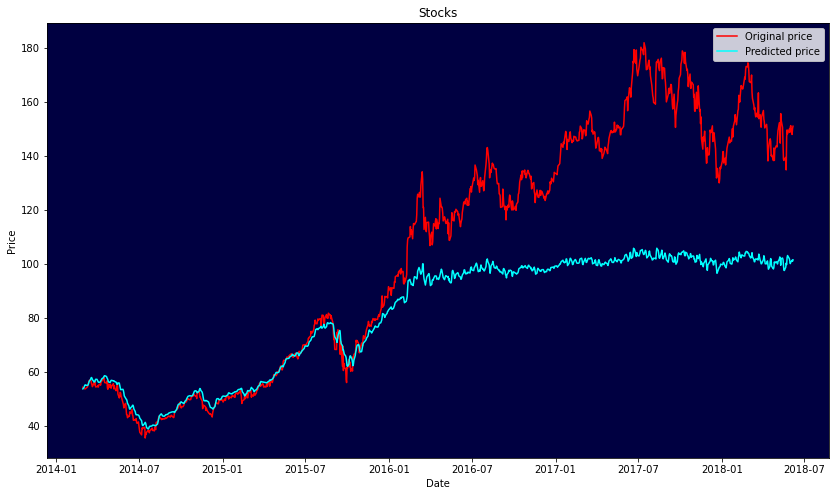

In [28]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

cyydate=yydate[1551:]
fig, ax = plt.subplots(figsize=(14,8))
ax.set_facecolor('#000041')
ax.plot(cyydate,y_test_scaled, color='red', label='Original price')
plt.plot(cyydate,predictions, color='cyan', label='Predicted price')
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Stocks")
plt.legend()

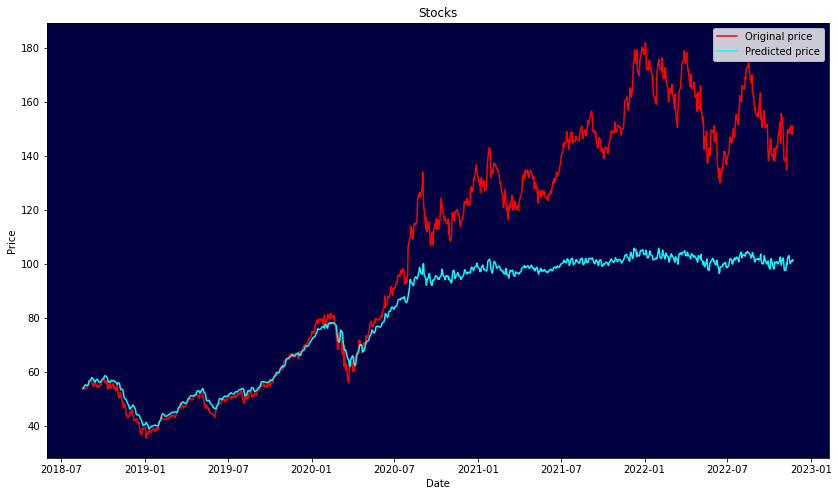

In [29]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

cydate=ydate[50:]
fig, ax = plt.subplots(figsize=(14,8))
ax.set_facecolor('#000041')
ax.plot(cydate,y_test_scaled, color='red', label='Original price')
plt.plot(cydate,predictions, color='cyan', label='Predicted price')
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Stocks")
plt.legend()

# Model SELECTION AND PREDICTION for attribute Open

In [30]:
average100=df['Open'].rolling(100).mean()
average100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3748    152.166400
3749    152.314900
3750    152.444000
3751    152.564901
3752    152.681700
Name: Open, Length: 3753, dtype: float64

In [31]:
average30=df['Open'].rolling(100).mean()
average30

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3748    152.166400
3749    152.314900
3750    152.444000
3751    152.564901
3752    152.681700
Name: Open, Length: 3753, dtype: float64

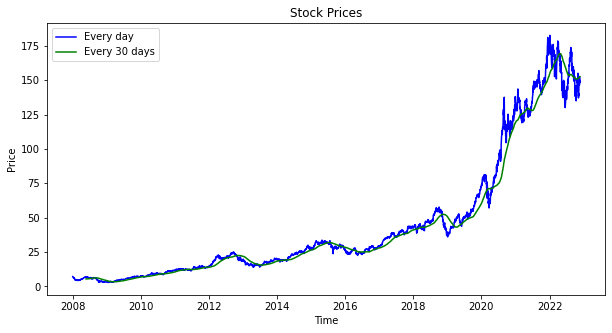

In [32]:
plt.figure(figsize=(10,5))
plt.plot(date,df['Open'],color='blue',label="Every day")
plt.plot(date,average30,color='green',label="Every 30 days")
plt.title("Stock Prices")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

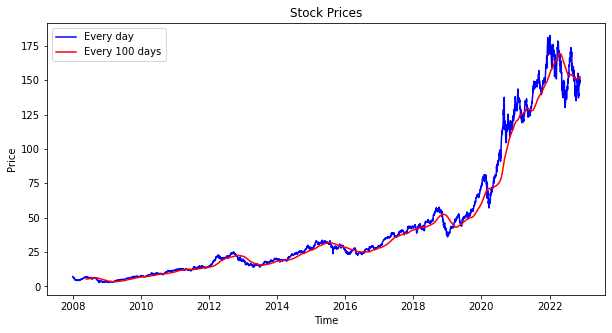

In [33]:
plt.figure(figsize=(10,5))
plt.plot(date,df['Open'],color='blue',label="Every day")
plt.plot(date,average100,color='red',label="Every 100 days")
plt.title("Stock Prices")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

In [34]:
df.shape

(3753, 5)

In [35]:
#Splitting data into training and testing

data_training= pd.DataFrame(df['Open'][0:int(len(df)*0.7)])
data_testing= pd.DataFrame(df['Open'][int(len(df)*0.7):int(len(df))])
ydate= date[int(len(df)*0.7):int(len(df))]
print(data_training.shape)
print(data_testing.shape)

(2627, 1)
(1126, 1)


In [36]:
data_training.head()

,Open
0,7.125000
1,7.116786
2,6.978929
3,6.837500
4,6.473214


In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [38]:
dataset_train = scaler.fit_transform(data_training)
dataset_test = scaler.transform(data_testing)

In [39]:
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    print(x)
    return x,y

In [40]:
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)
#displaying x_train and x_test

[[0.09412862 0.09394838 0.09092335 ... 0.03337723 0.03503865 0.03734269]
 [0.09394838 0.09092335 0.08781994 ... 0.03503865 0.03734269 0.03503865]
 [0.09092335 0.08781994 0.07982633 ... 0.03734269 0.03503865 0.03956833]
 ...
 [0.87037035 0.86153819 0.85978278 ... 0.96757886 0.96483596 0.96906005]
 [0.86153819 0.85978278 0.89055808 ... 0.96483596 0.96906005 0.98908321]
 [0.85978278 0.89055808 0.85528438 ... 0.96906005 0.98908321 0.99692796]]
[[1.00279773 0.98650488 0.98749237 ... 1.09068039 1.08552372 1.0994028 ]
 [0.98650488 0.98749237 0.98771176 ... 1.08552372 1.0994028  1.10867383]
 [0.98749237 0.98771176 0.99336214 ... 1.0994028  1.10867383 1.13423771]
 ...
 [3.43970296 3.4465053  3.33437539 ... 3.21017697 3.15092998 3.27995628]
 [3.4465053  3.33437539 3.33130335 ... 3.15092998 3.27995628 3.23277847]
 [3.33437539 3.33130335 3.25581892 ... 3.27995628 3.23277847 3.18823374]]


In [41]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [42]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [43]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [44]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [45]:
model.fit(x_train, y_train, epochs=50, batch_size=32)
model.save('stock_prediction')

Epoch 1/50
81/81 [==============================] - 25s 179ms/step - loss: 0.0074
Epoch 2/50
81/81 [==============================] - 14s 173ms/step - loss: 0.0020
Epoch 3/50
81/81 [==============================] - 14s 175ms/step - loss: 0.0020
Epoch 4/50
81/81 [==============================] - 15s 181ms/step - loss: 0.0017
Epoch 5/50
81/81 [==============================] - 14s 173ms/step - loss: 0.0017
Epoch 6/50
81/81 [==============================] - 13s 164ms/step - loss: 0.0017
Epoch 7/50
81/81 [==============================] - 15s 181ms/step - loss: 0.0014
Epoch 8/50
81/81 [==============================] - 15s 182ms/step - loss: 0.0014
Epoch 9/50
81/81 [==============================] - 14s 177ms/step - loss: 0.0014
Epoch 10/50
81/81 [==============================] - 14s 176ms/step - loss: 0.0012
Epoch 11/50
81/81 [==============================] - 14s 176ms/step - loss: 0.0017
Epoch 12/50
81/81 [==============================] - 14s 179ms/step - loss: 0.0011
Epoch 13/50
8

2022-11-25 21:42:51.746 WARNING absl: Found untraced functions such as lstm_cell_4_layer_call_fn, lstm_cell_4_layer_call_and_return_conditional_losses, lstm_cell_5_layer_call_fn, lstm_cell_5_layer_call_and_return_conditional_losses, lstm_cell_6_layer_call_fn while saving (showing 5 of 8). These functions will not be directly callable after loading.
2022-11-25 21:43:06.644 INFO    tensorflow: Assets written to: stock_prediction\assets
2022-11-25 21:43:15.574 WARNING absl: <keras.layers.recurrent.LSTMCell object at 0x0000029CC573EFA0> has the same name 'LSTMCell' as a built-in Keras object. Consider renaming <class 'keras.layers.recurrent.LSTMCell'> to avoid naming conflicts when loading with `tf.keras.models.load_model`. If renaming is not possible, pass the object in the `custom_objects` parameter of the load function.
2022-11-25 21:43:15.587 WARNING absl: <keras.layers.recurrent.LSTMCell object at 0x0000029CC5923B80> has the same name 'LSTMCell' as a built-in Keras object. Consider re

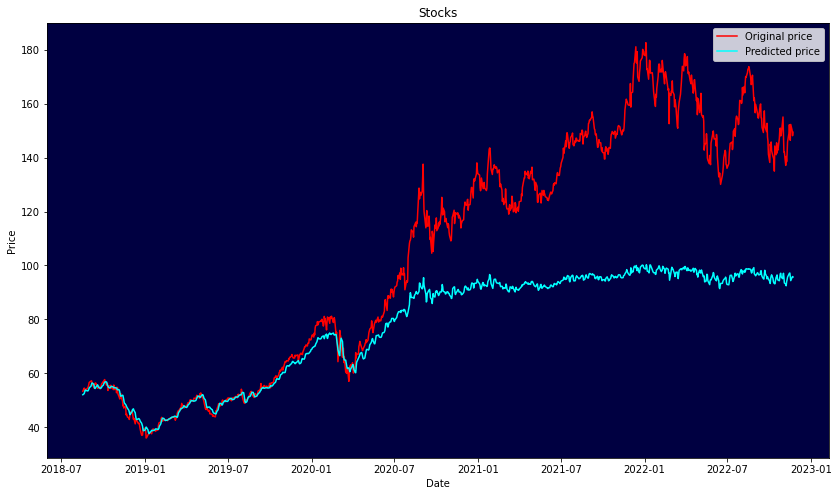

In [46]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

cydate=ydate[50:]
fig, ax = plt.subplots(figsize=(14,8))
ax.set_facecolor('#000041')
ax.plot(cydate,y_test_scaled, color='red', label='Original price')
plt.plot(cydate,predictions, color='cyan', label='Predicted price')
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Stocks")
plt.legend()

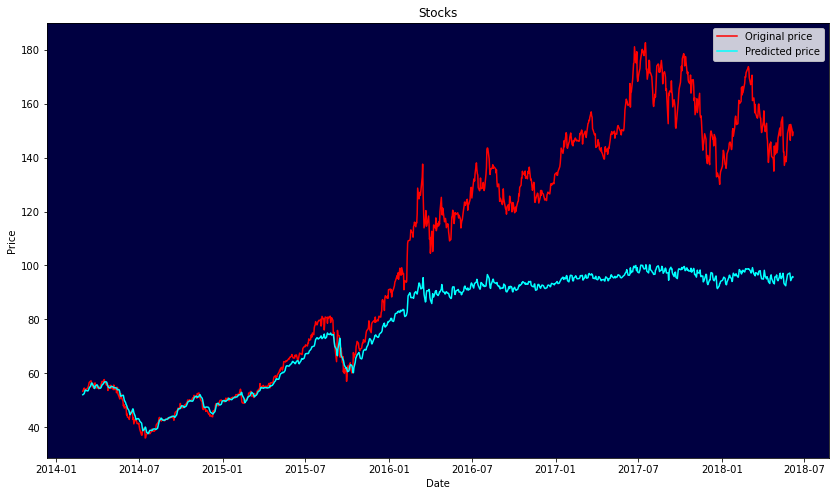

In [48]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

cyydate=yydate[1551:]
fig, ax = plt.subplots(figsize=(14,8))
ax.set_facecolor('#000041')
ax.plot(cyydate,y_test_scaled, color='red', label='Original price')
plt.plot(cyydate,predictions, color='cyan', label='Predicted price')
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Stocks")
plt.legend()

# Thank you...